In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
import os
path= r'C:\Datasets\titanic'
filename= os.listdir(path)
for i in filename:
    print(i)

gender_submission.csv
test.csv
train.csv


In [4]:
train_data = pd.read_csv(r"C:\Datasets\titanic\train.csv")
test_data = pd.read_csv(r"C:\Datasets\titanic\test.csv")
gender_submission_data = pd.read_csv(r"C:\Datasets\titanic\gender_submission.csv")
combined= [train_data,test_data]
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Shape of training Data",train_data.shape)
print("Shape of test Data",test_data.shape)
print("Shape of Gender submission data",gender_submission_data.shape)

Shape of training Data (891, 12)
Shape of test Data (418, 11)
Shape of Gender submission data (418, 2)


In [7]:
train_data.dtypes
print("Type of training Data",train_data.dtypes)
print("__________________________________________")
print("Type of test Data",test_data.dtypes)
print("__________________________________________")
print("Type of Gender submission data",gender_submission_data.dtypes)

Type of training Data PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
__________________________________________
Type of test Data PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
__________________________________________
Type of Gender submission data PassengerId    int64
Survived       int64
dtype: object


In [8]:
train_data.isnull().sum()
print("Shape of training Data",train_data.isnull().sum())
print("Shape of test Data",test_data.isnull().sum())
print("Shape of Gender submission data",gender_submission_data.isnull().sum())

Shape of training Data PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Shape of test Data PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Shape of Gender submission data PassengerId    0
Survived       0
dtype: int64


Exploratory Data Analysis

In [9]:
combine_data=[train_data,test_data]
# Data set observe
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print(dataframe.quantile([0, 0.25, 0.50, 0.75, 1]).T)

In [10]:
# Train and test observation
for dataset in combine_data:
    print(check_df(dataset))
    print("-" * 30)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN   

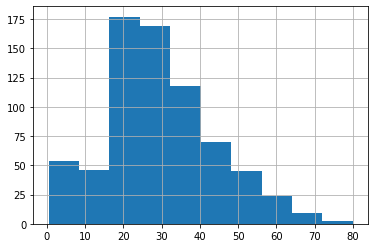

In [11]:
train_data['Age'].hist()

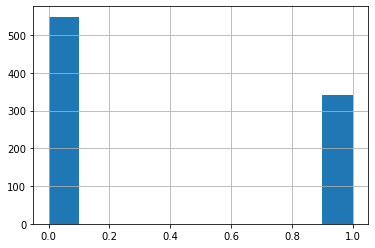

In [12]:
train_data['Survived'].hist()

In [13]:
count=0
set=0

for i in train_data['Survived']:
    if(i==1):
        count=count+1
    else:
        set = set+1
print(count)
print(set)

342
549


Text(0.5, 1.0, 'Outliers in Age')

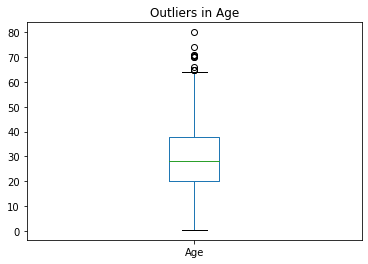

In [14]:
#Outlier Detection usin Box Plot

train_data['Age'].plot.box()
plt.title("Outliers in Age")

Text(0, 0.5, 'Frequency')

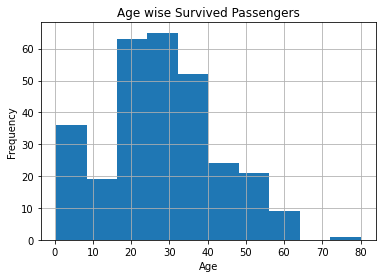

In [15]:
train_data["Age"][train_data["Survived"]==1].hist()
plt.title("Age wise Survived Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Sex wise Survived passengers')

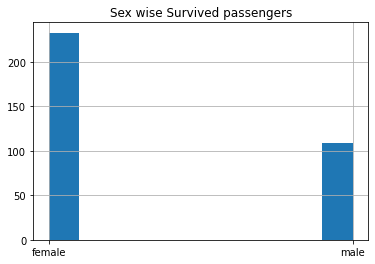

In [16]:
train_data["Sex"][train_data["Survived"]==1].hist()
plt.title("Sex wise Survived passengers")

Chi-square test of independence of variables in a contingency table.

In [17]:
import scipy.stats as st
st.chi2_contingency(pd.crosstab(train_data['Sex'],train_data['Survived']))

#Since the p- value is less than 0.05, it is independent


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [18]:
st.chi2_contingency(pd.crosstab(train_data['Age'],train_data['Survived']))
#Since the p- value is more than 0.05, it is dependent

(104.15604988902831,
 0.10141111018860959,
 87,
 array([[ 0.59383754,  0.40616246],
        [ 0.59383754,  0.40616246],
        [ 1.18767507,  0.81232493],
        [ 1.18767507,  0.81232493],
        [ 0.59383754,  0.40616246],
        [ 4.15686275,  2.84313725],
        [ 5.93837535,  4.06162465],
        [ 3.56302521,  2.43697479],
        [ 5.93837535,  4.06162465],
        [ 2.37535014,  1.62464986],
        [ 1.78151261,  1.21848739],
        [ 1.78151261,  1.21848739],
        [ 2.37535014,  1.62464986],
        [ 4.75070028,  3.24929972],
        [ 1.18767507,  0.81232493],
        [ 2.37535014,  1.62464986],
        [ 0.59383754,  0.40616246],
        [ 1.18767507,  0.81232493],
        [ 3.56302521,  2.43697479],
        [ 0.59383754,  0.40616246],
        [ 2.96918768,  2.03081232],
        [10.0952381 ,  6.9047619 ],
        [ 7.71988796,  5.28011204],
        [15.43977591, 10.56022409],
        [14.84593838, 10.15406162],
        [ 8.90756303,  6.09243697],
        [ 0.5938

Text(0.5, 1.0, 'P Class wise survival rate')

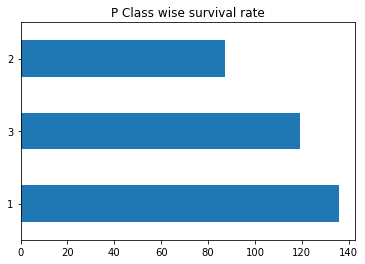

In [19]:
train_data['Pclass'][train_data['Survived']==1].value_counts().plot.barh()
plt.title("P Class wise survival rate")
    

In [20]:
#Removing Outliers

X_train=train_data[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [21]:
X_train.dropna(inplace=True)
X_train.isnull().sum()

<ipython-input-21-099bf956a437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.dropna(inplace=True)


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [22]:
X_train.shape

(712, 8)

In [23]:
X_test=test_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked']]
X_test['Age'].replace(np.nan,round(X_test['Age'].mean(),0),inplace=True)
X_test.shape

C:\Users\Karthick\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(418, 7)

In [24]:
#Splitting the Data set based on dependent and independent variables
Y_train=X_train['Survived']
X_train.drop('Survived',axis=1,inplace=True)


C:\Users\Karthick\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
X_train.shape,X_test.shape

((712, 10), (418, 10))

In [26]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,1,0,1,0,0
2,3,3,26.0,0,0,1,0,0,0,1
3,4,1,35.0,1,0,1,0,0,0,1
4,5,3,35.0,0,0,0,1,0,0,1


Data Modelling

In [41]:
#Implementing Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=5, random_state=0)
model.fit(X_train,Y_train)
scores = cross_val_score(model, X_train,Y_train, cv=5)
scores.mean()

0.7417906037624348

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(model, X_train,Y_train, cv=5)
scores.mean()

0.7781542401260712

In [48]:
model.fit(X_train,Y_train)
predict=model.predict(X_test)

In [49]:
predictions=pd.DataFrame({'PassengerID':X_test['PassengerId'],'Survived':predict})

In [50]:
predictions

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
filename = 'Titanic Predictions.csv'

predictions.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions.csv
